# Installation Requirements

In [1]:
!pip uninstall --quiet tensorflow --yes
!pip uninstall --quiet kapre --yes
!pip install --quiet tensorflow==1.14.0
!pip install --quiet stable_baselines
!pip uninstall --quiet optuna --yes
!pip install --quiet optuna==2.10.0
!pip uninstall --quiet tensorboard-plugin-wit --yes
!pip install --quiet "gym==0.19.0"

     |████████████████████████████████| 109.3 MB 35 kB/s 
     |████████████████████████████████| 3.1 MB 43.3 MB/s 
     |████████████████████████████████| 488 kB 9.5 MB/s 
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 240 kB 2.1 MB/s 
     |████████████████████████████████| 1.6 MB 12.9 MB/s 
     |████████████████████████████████| 18.3 MB 103 kB/s 
     |████████████████████████████████| 308 kB 2.1 MB/s 
     |████████████████████████████████| 209 kB 43.6 MB/s 
     |████████████████████████████████| 81 kB 7.4 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 147 kB 53.4 MB/s 
     |████████████████████████████████| 112 kB 35.6 MB/s 
     |████████████████████████████████| 1.6 MB 2.1 MB/s 


In [2]:
# Set working directory
%cd /content/drive/MyDrive/ColabNotebooks/Masterarbeit/RLModel/src

# run config.py to load all required settings  
%run config.py

ERROR:root:File `'config.py'` not found.


[Errno 2] No such file or directory: '/content/drive/MyDrive/ColabNotebooks/Masterarbeit/RLModel/src'
/content


In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Modellergebnisse

## Acc

In [4]:
TN_acc=225/292
FP_acc=16/292
FN_acc=27/292
TP_acc=24/292
MPT_acc=1.88

## F1

In [5]:
TN_f1=215/292
FP_f1=26/292
FN_f1=11/292
TP_f1=40/292
MPT_f1=1.83

## GM

In [6]:
TN_gm=216/292
FP_gm=25/292
FN_gm=15/292
TP_gm=36/292
MPT_gm=2.05

## Sens

In [7]:
TN_sens=185/292
FP_sens=56/292
FN_sens=14/292
TP_sens=37/292
MPT_sens=20.72

## Spez

In [8]:
TN_spez=240/292
FP_spez=1/292
FN_spez=48/292
TP_spez=3/292
MPT_spez=21.5

# Eingesparte Produktionszeit

In [9]:
def eingesparteZeit(TN,FP,FN,TP,MPT):
  return (176-(TN+FN)*176-(FP+TP)*MPT)/176

In [10]:
e_acc=eingesparteZeit(TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc)
e_f1=eingesparteZeit(TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1)
e_gm=eingesparteZeit(TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm)
e_sens=eingesparteZeit(TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens)
e_spez=eingesparteZeit(TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez)

In [11]:
e_acc

0.13552303860523038

In [12]:
e_f1

0.2236772260273973

In [13]:
e_gm

0.20647085149439606

In [14]:
e_sens

0.28099782067247825

In [15]:
e_spez

0.012025217932752274

# Gewinnvergleichsfunktionen

In [17]:
def gewinn_no_model(menge,preis,kosten):
  return (241/292)*menge*preis-menge*kosten

def gewinn_mit_model(menge,preis,kosten,TN,FP,FN,TP,MPT,e):
  return (1+e)*(TN*menge*preis-(TN+FN)*menge*kosten-(MPT/176)*(TP+FP)*menge*preis)

# Sensitivitätsanalysen

## Variable Menge

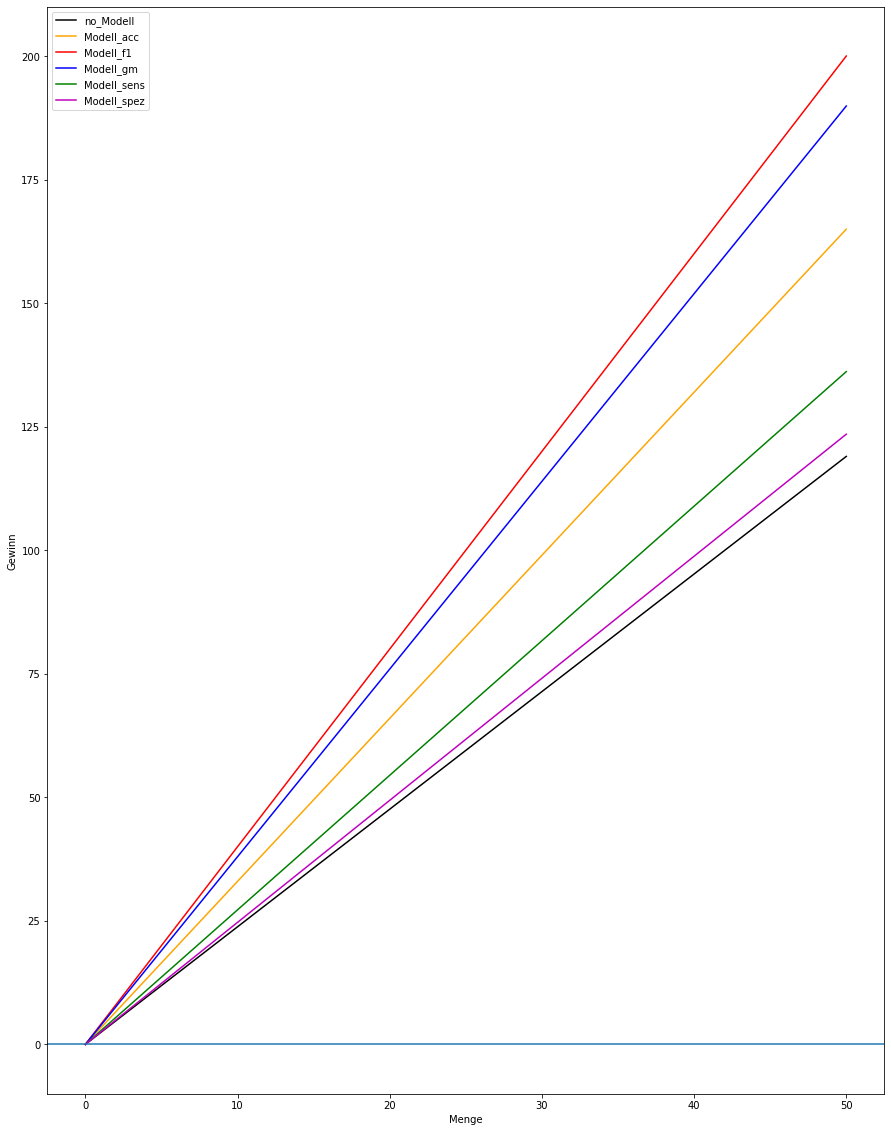

In [ ]:
kosten= 10
preis = 15
menge = np.linspace(0,50,10)


plt.figure(figsize=(15, 20))
plt.plot(menge, gewinn_no_model(menge,preis,kosten), label='no_Modell',color='black')
plt.plot(menge, gewinn_mit_model(menge,preis,kosten,TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc,e_acc),label='Modell_acc', color='orange')
plt.plot(menge, gewinn_mit_model(menge,preis,kosten,TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1,e_f1), label='Modell_f1', color='red')
plt.plot(menge, gewinn_mit_model(menge,preis,kosten,TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm,e_gm),label='Modell_gm', color='blue')
plt.plot(menge, gewinn_mit_model(menge,preis,kosten,TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens,e_sens), label='Modell_sens',color='green')
plt.plot(menge, gewinn_mit_model(menge,preis,kosten,TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez,e_spez), label='Modell_spez', color='m')
plt.ylabel('Gewinn')
plt.xlabel('Menge')
plt.legend()
plt.axhline(y=0, xmin=0, xmax=1)
plt.show()

In [35]:
# Steigungen
preis=15
kosten=10
menge_1=1
menge_2=2
y_no_model_1 = gewinn_no_model(menge_1,preis,kosten)
y_acc_1 = gewinn_mit_model(menge_1,preis,kosten,TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc,e_acc)
y_f1_1 = gewinn_mit_model(menge_1,preis,kosten,TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1,e_f1)
y_gm_1 = gewinn_mit_model(menge_1,preis,kosten,TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm,e_gm)
y_sens_1 = gewinn_mit_model(menge_1,preis,kosten,TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens,e_sens)
y_spez_1 = gewinn_mit_model(menge_1,preis,kosten,TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez,e_spez)

y_no_model_2 = gewinn_no_model(menge_2,preis,kosten)
y_acc_2 = gewinn_mit_model(menge_2,preis,kosten,TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc,e_acc)
y_f1_2 = gewinn_mit_model(menge_2,preis,kosten,TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1,e_f1)
y_gm_2 = gewinn_mit_model(menge_2,preis,kosten,TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm,e_gm)
y_sens_2 = gewinn_mit_model(menge_2,preis,kosten,TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens,e_sens)
y_spez_2 = gewinn_mit_model(menge_2,preis,kosten,TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez,e_spez)

In [36]:
def steigung(x1,x2,y1,y2):
  return (y2-y1)/(x2-x1)

In [37]:
steigung(menge_1,menge_2,y_no_model_1,y_no_model_2)

2.3801369863013697

In [38]:
steigung(menge_1,menge_2,y_acc_1,y_acc_2)

3.299981258985219

In [39]:
steigung(menge_1,menge_2,y_f1_1,y_f1_2)

4.0008640262706106

In [40]:
steigung(menge_1,menge_2,y_gm_1,y_gm_2)

3.7984922025395416

In [41]:
steigung(menge_1,menge_2,y_sens_1,y_sens_2)

2.7233068472965445

In [42]:
steigung(menge_1,menge_2,y_spez_1,y_spez_2)

2.47000161669725

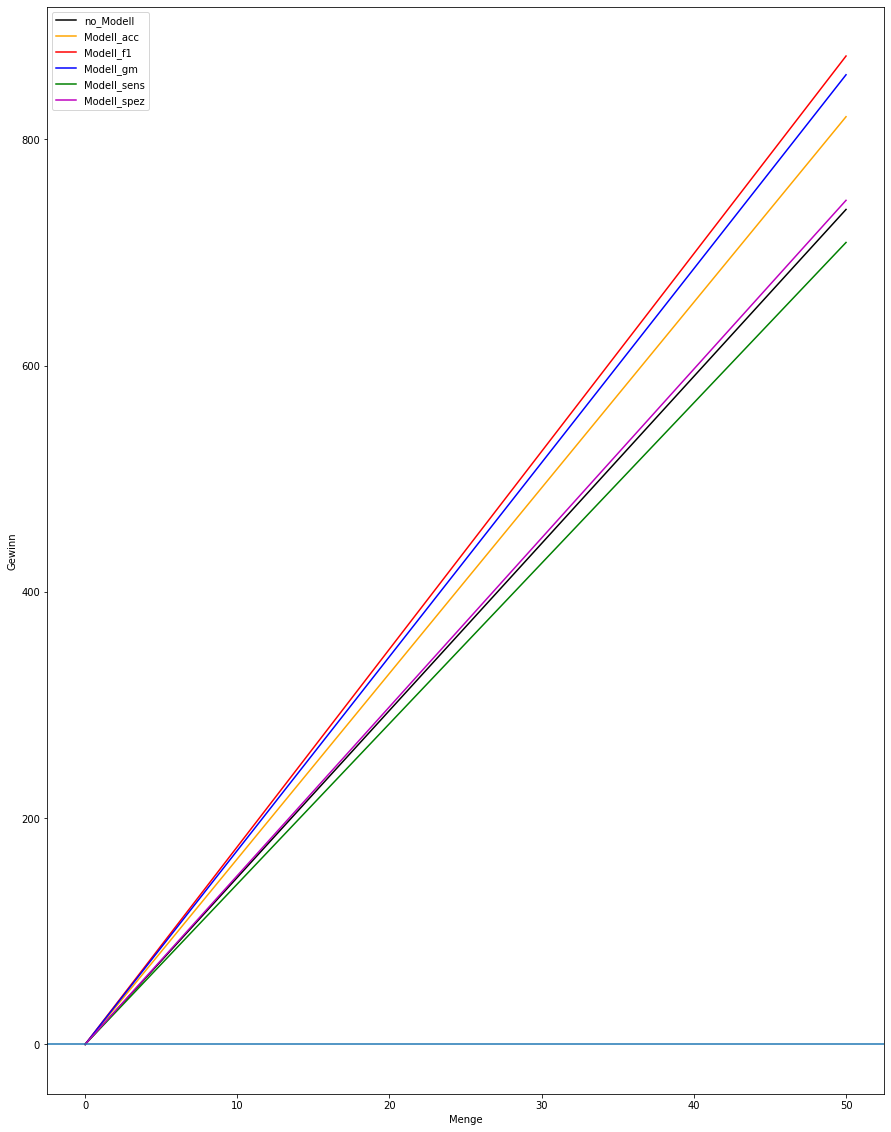

In [ ]:
kosten= 10
preis = 30
menge = np.linspace(0,50,10)


plt.figure(figsize=(15,20))
plt.plot(menge, gewinn_no_model(menge,preis,kosten), label='no_Modell',color='black')
plt.plot(menge, gewinn_mit_model(menge,preis,kosten,TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc,e_acc),label='Modell_acc', color='orange')
plt.plot(menge, gewinn_mit_model(menge,preis,kosten,TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1,e_f1), label='Modell_f1', color='red')
plt.plot(menge, gewinn_mit_model(menge,preis,kosten,TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm,e_gm),label='Modell_gm', color='blue')
plt.plot(menge, gewinn_mit_model(menge,preis,kosten,TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens,e_sens), label='Modell_sens',color='green')
plt.plot(menge, gewinn_mit_model(menge,preis,kosten,TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez,e_spez), label='Modell_spez', color='m')
plt.ylabel('Gewinn')
plt.xlabel('Menge')
plt.legend()
plt.axhline(y=0, xmin=0, xmax=1)
plt.show()

In [43]:
# Steigungen
preis=30
kosten=10
menge_1=1
menge_2=2
y_no_model_1 = gewinn_no_model(menge_1,preis,kosten)
y_acc_1 = gewinn_mit_model(menge_1,preis,kosten,TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc,e_acc)
y_f1_1 = gewinn_mit_model(menge_1,preis,kosten,TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1,e_f1)
y_gm_1 = gewinn_mit_model(menge_1,preis,kosten,TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm,e_gm)
y_sens_1 = gewinn_mit_model(menge_1,preis,kosten,TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens,e_sens)
y_spez_1 = gewinn_mit_model(menge_1,preis,kosten,TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez,e_spez)

y_no_model_2 = gewinn_no_model(menge_2,preis,kosten)
y_acc_2 = gewinn_mit_model(menge_2,preis,kosten,TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc,e_acc)
y_f1_2 = gewinn_mit_model(menge_2,preis,kosten,TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1,e_f1)
y_gm_2 = gewinn_mit_model(menge_2,preis,kosten,TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm,e_gm)
y_sens_2 = gewinn_mit_model(menge_2,preis,kosten,TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens,e_sens)
y_spez_2 = gewinn_mit_model(menge_2,preis,kosten,TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez,e_spez)

In [44]:
def steigung(x1,x2,y1,y2):
  return (y2-y1)/(x2-x1)

In [45]:
steigung(menge_1,menge_2,y_no_model_1,y_no_model_2)

14.76027397260274

In [46]:
steigung(menge_1,menge_2,y_acc_1,y_acc_2)

16.399681892234756

In [47]:
steigung(menge_1,menge_2,y_f1_1,y_f1_2)

17.47265452795875

In [48]:
steigung(menge_1,menge_2,y_gm_1,y_gm_2)

17.141325730257353

In [49]:
steigung(menge_1,menge_2,y_sens_1,y_sens_2)

14.176701582052786

In [50]:
steigung(menge_1,menge_2,y_spez_1,y_spez_2)

14.921621821224385

## Variabler Preis

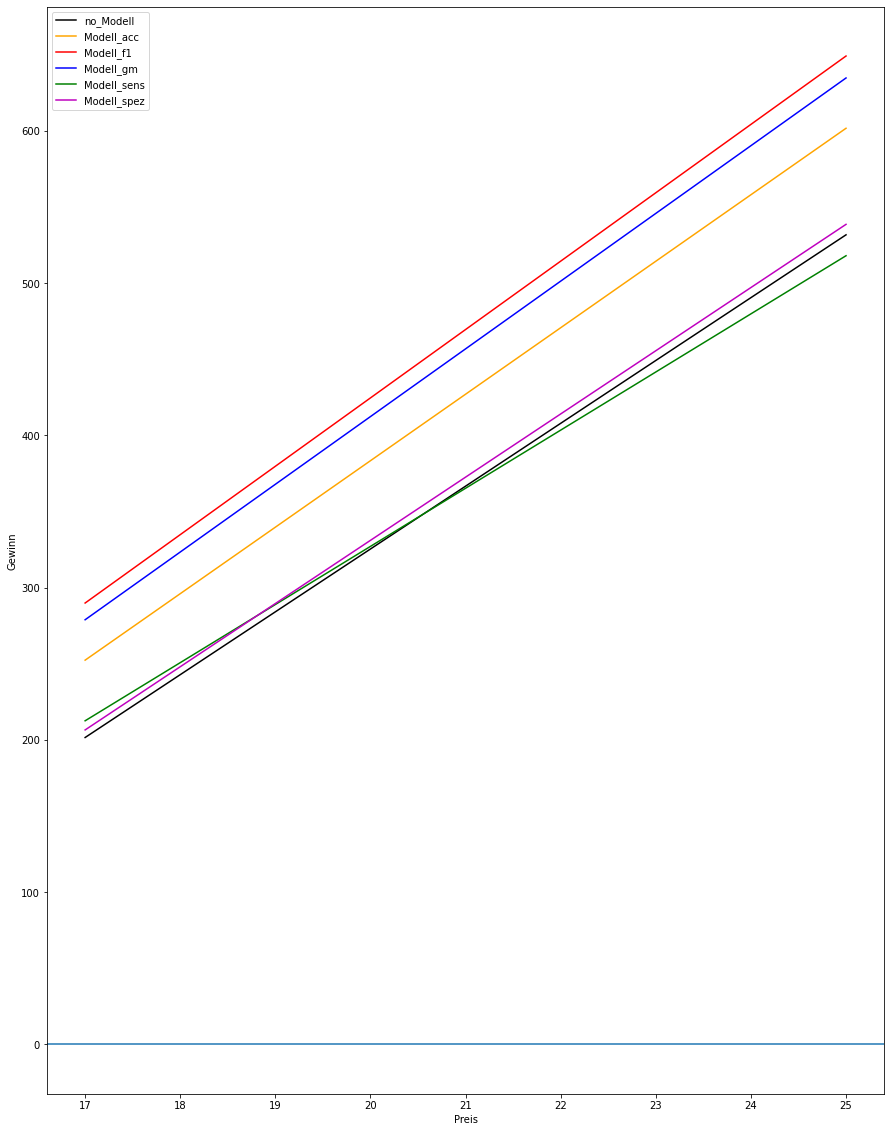

In [18]:
menge=50
kosten=10
preis = np.linspace(17,25,100)

plt.figure(figsize=(15, 20))
plt.plot(preis, gewinn_no_model(menge,preis,kosten), label='no_Modell',color='black')
plt.plot(preis, gewinn_mit_model(menge,preis,kosten,TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc,e_acc),label='Modell_acc', color='orange')
plt.plot(preis, gewinn_mit_model(menge,preis,kosten,TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1,e_f1), label='Modell_f1', color='red')
plt.plot(preis, gewinn_mit_model(menge,preis,kosten,TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm,e_gm),label='Modell_gm', color='blue')
plt.plot(preis, gewinn_mit_model(menge,preis,kosten,TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens,e_sens), label='Modell_sens',color='green')
plt.plot(preis, gewinn_mit_model(menge,preis,kosten,TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez,e_spez), label='Modell_spez', color='m')
plt.ylabel('Gewinn')
plt.xlabel('Preis')
plt.legend()
plt.axhline(y=0, xmin=0, xmax=1)
plt.show()

In [24]:
# Steigungen
menge=50
kosten=10
preis_1=11
preis_2=12
y_no_model_1 = gewinn_no_model(menge,preis_1,kosten)
y_acc_1 = gewinn_mit_model(menge,preis_1,kosten,TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc,e_acc)
y_f1_1 = gewinn_mit_model(menge,preis_1,kosten,TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1,e_f1)
y_gm_1 = gewinn_mit_model(menge,preis_1,kosten,TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm,e_gm)
y_sens_1 = gewinn_mit_model(menge,preis_1,kosten,TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens,e_sens)
y_spez_1 = gewinn_mit_model(menge,preis_1,kosten,TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez,e_spez)

y_no_model_2 = gewinn_no_model(menge,preis_2,kosten)
y_acc_2 = gewinn_mit_model(menge,preis_2,kosten,TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc,e_acc)
y_f1_2 = gewinn_mit_model(menge,preis_2,kosten,TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1,e_f1)
y_gm_2 = gewinn_mit_model(menge,preis_2,kosten,TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm,e_gm)
y_sens_2 = gewinn_mit_model(menge,preis_2,kosten,TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens,e_sens)
y_spez_2 = gewinn_mit_model(menge,preis_2,kosten,TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez,e_spez)

In [25]:
def steigung(x1,x2,y1,y2):
  return (y2-y1)/(x2-x1)

In [28]:
steigung(preis_1,preis_2,y_no_model_1,y_no_model_2)

41.26712328767121

In [27]:
steigung(preis_1,preis_2,y_acc_1,y_acc_2)

43.66566877749845

In [29]:
steigung(preis_1,preis_2,y_f1_1,y_f1_2)

44.90596833896049

In [30]:
steigung(preis_1,preis_2,y_gm_1,y_gm_2)

44.476111759059336

In [31]:
steigung(preis_1,preis_2,y_sens_1,y_sens_2)

38.177982449187496

In [32]:
steigung(preis_1,preis_2,y_spez_1,y_spez_2)

41.50540068175709

## Variable Kostem

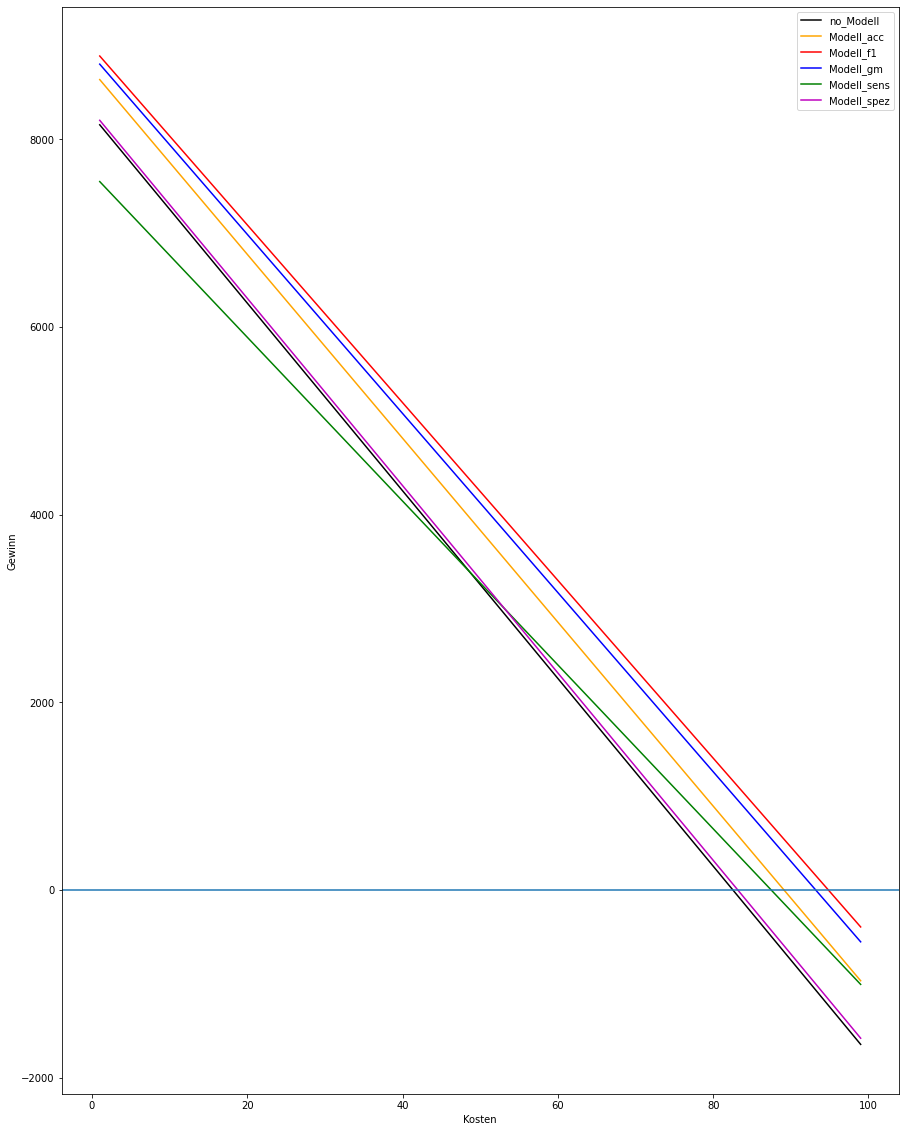

In [23]:
preis=100
kosten = np.linspace(1,99,100)
menge=100

plt.figure(figsize=(15, 20))
plt.plot(kosten, gewinn_no_model(menge,preis,kosten), label='no_Modell',color='black')
plt.plot(kosten, gewinn_mit_model(menge,preis,kosten,TN_acc,FP_acc,FN_acc,TP_acc,MPT_acc,e_acc),label='Modell_acc', color='orange')
plt.plot(kosten, gewinn_mit_model(menge,preis,kosten,TN_f1,FP_f1,FN_f1,TP_f1,MPT_f1,e_f1), label='Modell_f1', color='red')
plt.plot(kosten, gewinn_mit_model(menge,preis,kosten,TN_gm,FP_gm,FN_gm,TP_gm,MPT_gm,e_gm),label='Modell_gm', color='blue')
plt.plot(kosten, gewinn_mit_model(menge,preis,kosten,TN_sens,FP_sens,FN_sens,TP_sens,MPT_sens,e_sens), label='Modell_sens',color='green')
plt.plot(kosten, gewinn_mit_model(menge,preis,kosten,TN_spez,FP_spez,FN_spez,TP_spez,MPT_spez,e_spez), label='Modell_spez', color='m')
plt.ylabel('Gewinn')
plt.xlabel('Kosten')
plt.legend()
plt.axhline(y=0, xmin=0, xmax=1)
plt.show()